In [1]:
### Loading Libraries

import os
import sys
import numpy                              as np
import pandas                             as pd

import matplotlib
from matplotlib                           import pyplot as plt
WORKSPACE_PATH  = os.environ['WORKSPACE_PATH']
plt.style.use(WORKSPACE_PATH+'/ROMNet/romnet/extra/postprocessing/presentation.mplstyle')

from tensorflow                           import keras

import romnet                             as rmnt

In [2]:
### Input Data

ROMNetFldr    = WORKSPACE_PATH + '/ROMNet/romnet/'

OutputDir     = WORKSPACE_PATH+'/ROMNet/Data/PSR_10Cases/'
TestDir       = WORKSPACE_PATH+'/ROMNet/Data/PSR_10Cases_Test/'

PathToRunFld  = WORKSPACE_PATH + '/ROMNet/PSR_10Cases/DeepONet/Deterministic/Run_24/'
#PathToRunFld  = WORKSPACE_PATH + '/ROMNet/PSR_10Cases/DeepONet/MCDropOut/Run_2/'
#PathToRunFld  = WORKSPACE_PATH + '/ROMNet/PSR_10Cases/DeepONet/BayesByBackprop/Run_1/'

CasesVec      = [0] 
DirDir        = OutputDir #OutputDir #TestDir

NSamples      = 2

NVarsRed      = 3
TestInputVars = ['PC_'+str(i+1) for i in range(NVarsRed)]

In [3]:
Var = 'H'

FileName       = DirDir + '/Orig/train/ext/y.csv.' + str(1)
Data           = pd.read_csv(FileName, header=0)
tVec           = Data['t']
VarNames_Orig  = list(Data.columns)
iS_Orig        = VarNames_Orig.index(Var)
y_Orig         = Data.to_numpy()[:,1:]
y_Orig_i       = Data[Var].to_numpy()

FileName       = DirDir + '/Orig/train/ext/ySource.csv.' + str(1)
DataSource     = pd.read_csv(FileName, header=0)
tVec           = DataSource['t'].to_numpy()
VarNames_Orig  = list(DataSource.columns)
iS_Orig        = VarNames_Orig.index(Var)
dy_dt_Orig     = DataSource.to_numpy()[:,1:]
dy_dt_Orig_i   = DataSource[Var].to_numpy()

dy_dt_i        = np.gradient(y_Orig_i, tVec, edge_order=1)

In [13]:
# y_Masked = [y_Orig[:,i] for i in range(y_Orig.shape[1]) if any(np.abs(y_Orig[:,i]) > 0)]
# y_Masked = np.stack(y_Masked,axis=1)
# y_Masked.shape

to_orig  = pd.read_csv(DirDir+'/3PC/ROM/ToOrig_Mask.csv',   header=None).to_numpy(int)[:,0]
n_mask   = len(to_orig)
y_Masked = y_Orig[:,to_orig]

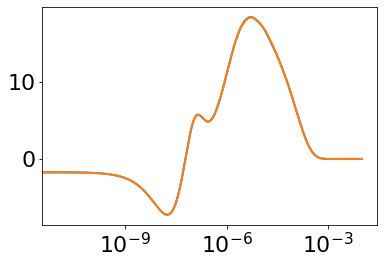

In [14]:
plt.plot(tVec, dy_dt_Orig_i)
plt.plot(tVec, dy_dt_i)
plt.xscale('log')

In [15]:
print("\n[ROMNet]: Reading Input File from: ", PathToRunFld)
sys.path.insert(0, PathToRunFld)

print("\n[ROMNet]: Keep Loading Modules and Functions...")
from ROMNet_Input import inputdata

print("\n[ROMNet]: Initializing Input ...")
InputData               = inputdata(WORKSPACE_PATH, ROMNetFldr)


InputData.InputFilePath = PathToRunFld+'/ROMNet_Input.py'
InputData.TrainIntFlg   = 0
InputData.PathToRunFld  = PathToRunFld


[ROMNet]: Reading Input File from:  /Users/sventur/WORKSPACE//ROMNet/PSR_10Cases/DeepONet/Deterministic/Run_24/

[ROMNet]: Keep Loading Modules and Functions...

[ROMNet]: Initializing Input ...


In [16]:
Var        = 'H'


FileName   = DirDir + '/Orig/train/ext/RestVecTot.csv'
DataRest   = pd.read_csv(FileName, header=None)
Rest       = DataRest.to_numpy()

PSR        = rmnt.pinn.system.PSR(InputData)

dy_dt_Pred = PSR.f_temp(0., y_Masked, np.log10(Rest))

In [17]:
dy_dt_Orig[0,:]

array([-6.33907912e+00, -5.00152913e+00, -1.71957091e+00, -2.13994880e+01,
        6.77096619e+03, -5.43593707e+01, -2.42763169e+02, -5.24223892e-02,
       -2.50687552e-03, -7.87165031e-09, -9.46922582e-10, -1.94239549e-07,
       -6.69702821e-09, -3.18507260e-07,  1.72039890e+03, -1.49554911e+02,
       -1.70090329e+02, -5.66256309e-04, -4.73340691e-06, -2.77295203e-10,
       -7.14058038e-12, -6.72401859e-12, -3.06187464e-14, -2.50904512e-13,
       -2.23353898e-17, -2.90991999e-18, -3.75583956e-22, -6.65548274e-24,
       -9.73884737e-12, -2.25420213e-12, -1.58282676e-14,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.48488521e-34, -1.58496302e-36,
       -3.20491386e-13, -

In [18]:
dy_dt_Pred[0,:]

array([-6.33907912e+00, -5.00152913e+00, -1.71957091e+00, -2.13994880e+01,
        6.77096619e+03, -5.43593707e+01, -2.42763169e+02, -5.24223892e-02,
       -2.50687553e-03, -7.87165031e-09, -9.46922582e-10, -1.94239549e-07,
       -6.69702821e-09, -3.18507260e-07,  1.72039890e+03, -1.49554911e+02,
       -1.70090329e+02, -5.66256309e-04, -4.73340691e-06, -2.77295203e-10,
       -7.14058038e-12, -6.72401859e-12, -3.06187464e-14, -2.50904512e-13,
       -2.23353898e-17, -2.90991999e-18, -6.32122731e-20, -9.73884737e-12,
       -2.25420213e-12, -1.58282676e-14, -3.20491386e-13, -5.43058899e-15])